In [1]:
!wget https://aseblr-my.sharepoint.com/:x:/g/personal/bl_en_u4cse22138_bl_students_amrita_edu/EdgpRTbM6vJLpU0yBrk10aUB2VO1s23c4tzbUWLCQu_VEA?download=1
!mv EdgpRTbM6vJLpU0yBrk10aUB2VO1s23c4tzbUWLCQu_VEA?download=1 dataset.xlsx

--2024-08-24 15:03:17--  https://aseblr-my.sharepoint.com/:x:/g/personal/bl_en_u4cse22138_bl_students_amrita_edu/EdgpRTbM6vJLpU0yBrk10aUB2VO1s23c4tzbUWLCQu_VEA?download=1
Resolving aseblr-my.sharepoint.com (aseblr-my.sharepoint.com)... 13.107.136.10, 13.107.138.10, 2620:1ec:8f8::10, ...
Connecting to aseblr-my.sharepoint.com (aseblr-my.sharepoint.com)|13.107.136.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/bl_en_u4cse22138_bl_students_amrita_edu/Documents/Semester%205/Machine%20Learning/Project/Dataset/custom_dataset_processed.xlsx?ga=1 [following]
--2024-08-24 15:03:18--  https://aseblr-my.sharepoint.com/personal/bl_en_u4cse22138_bl_students_amrita_edu/Documents/Semester%205/Machine%20Learning/Project/Dataset/custom_dataset_processed.xlsx?ga=1
Reusing existing connection to aseblr-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 624976 (610K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]


In [2]:
import pandas as pd

df = pd.read_excel("./dataset.xlsx")

display(df)

,text,text_length,average_word_length,unique_word_count,stop_word_count,special_character_count,keywords,sentiment,source,is_AI
0,Harsh on Les Ames to be included here. While h...,267,4.176,45,26,54,"first innings, first time, Les Ames",0,Reddit,1
1,DK Popa on there too? Tbh he&apos;s had some b...,65,3.333,14,9,15,"DK Popa, Tbh he&apos",0,Reddit,0
2,And got out for a golden duck in the first inn...,133,3.926,24,13,27,"first innings, first, test cricket",0,Reddit,0
3,Surprising how Prior was persisted by England ...,88,4.867,15,7,15,NaN,1,Reddit,0
4,Madande making Nsync proud,26,5.750,4,0,3,NaN,1,Reddit,1
...,...,...,...,...,...,...,...,...,...,...
4879,Review incoming?? On autofocus or the main cha...,51,5.125,8,3,10,NaN,0,Instagram,0
4880,The haters reigned after Thriller's unpreceden...,204,4.714,32,15,39,NaN,0,Instagram,1
4881,Ya está listo mi chocolate casero???,37,4.500,6,0,10,Ya está listo mi chocolate casero,0,Instagram,0
4882,I can’t wait! I love my Pixel ecosystem and lo...,89,4.438,15,8,18,Pixel ecosystem,1,Instagram,0


In [11]:
df.isnull().sum()

,0
text,1
text_length,0
average_word_length,10
unique_word_count,0
stop_word_count,0
special_character_count,0
keywords,1468
sentiment,0
source,0
is_AI,0


In [24]:
df = df.dropna()
print(len(df.index.values))

3415


In [46]:
# A1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

X = df.loc[:, ["text_length", "unique_word_count", "stop_word_count",	"special_character_count"]]
y = df["average_word_length"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

model.score(X_test, y_test)

0.45884603404353486

In [44]:
input = [267, 45,	26, 54]
model.predict([input])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.00097626])

In [47]:
# A2
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

MSE = mean_squared_error(y_test, y_pred)
RMSE = MSE ** 0.5
MAPE = mean_absolute_percentage_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)


print(f"MSE = {MSE}")
print(f"RMSE = {RMSE}")
print(f"MAPE = {MAPE}")
print(f"R2 Score = {R2}")

MSE = 0.3430886818993875
RMSE = 0.5857377244973961
MAPE = 0.09359121681365154
R2 Score = 0.45884603404353486


In [53]:
# A4
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=2, random_state=42, n_init="auto")
k_means.fit(X_train, y_train)

k_means.cluster_centers_

array([[ 93.78763971,  15.95003287,   6.99145299,  19.66732413],
       [352.66743383,  47.23475259,  22.70425777,  73.10471807]])

In [54]:
# A5
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

SH = silhouette_score(X_train, k_means.labels_)
CH = calinski_harabasz_score(X_train, k_means.labels_)
DB = davies_bouldin_score(X_train, k_means.labels_)

print(f"SH = {SH}")
print(f"CH = {CH}")
print(f"DB = {DB}")

SH = 0.6285083723234204
CH = 2220.5495254571183
DB = 0.622019179574983


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

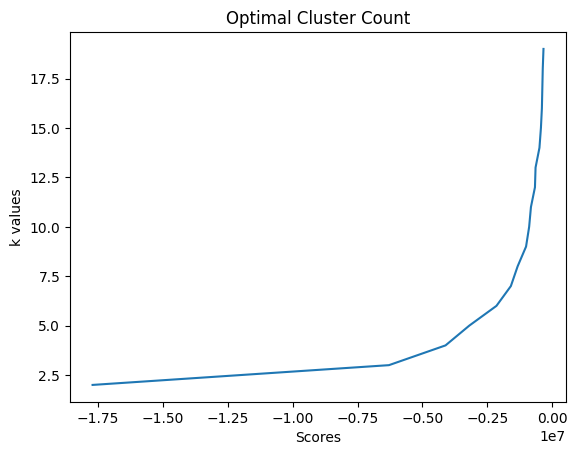

In [63]:
# A6
import matplotlib.pyplot as plt

k_values = range(2, 20)
scores = []

for k in k_values:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X_train, y_train)

  scores.append(kmeans.score(X_test, y_test))

plt.plot(scores, k_values)
plt.title("Optimal Cluster Count")
plt.xlabel("Scores")
plt.ylabel("k values")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

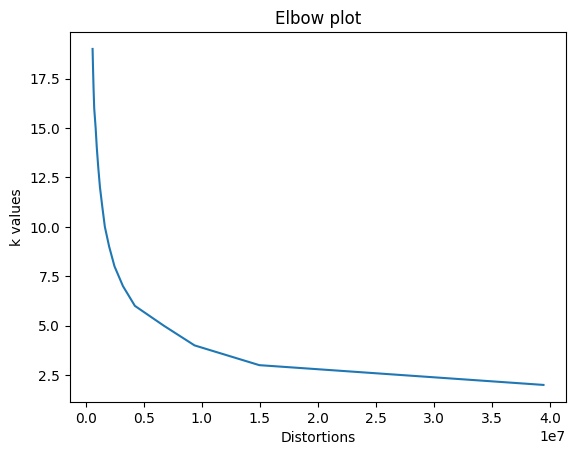

In [60]:
# A7
import matplotlib.pyplot as plt

distortions = []
k_values = range(2, 20)

for k in k_values:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X_train, y_train)
  distortions.append(kmeans.inertia_)

plt.plot(distortions, k_values)
plt.title("Elbow plot")
plt.xlabel("Distortions")
plt.ylabel("k values")
plt.show()